In [ ]:
#Importing Neccessary libarary
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c kkbox-music-recommendation-challenge

!7z e members.csv.7z
!7z e song_extra_info.csv.7z
!7z e songs.csv.7z
!7z e test.csv.7z
!7z e train.csv.7z

Saving kaggle.json to kaggle.json
  0% 0.00/453k [00:00<?, ?B/s]
100% 453k/453k [00:00<00:00, 62.5MB/s]
 93% 94.0M/101M [00:00<00:00, 92.1MB/s]
100% 101M/101M [00:00<00:00, 130MB/s]  
 82% 81.0M/98.8M [00:00<00:00, 86.9MB/s]
100% 98.8M/98.8M [00:00<00:00, 131MB/s] 
 60% 25.0M/41.9M [00:00<00:00, 34.9MB/s]
100% 41.9M/41.9M [00:00<00:00, 106MB/s] 
  0% 0.00/1.29M [00:00<?, ?B/s]
100% 1.29M/1.29M [00:00<00:00, 175MB/s]
 96% 97.0M/101M [00:01<00:00, 72.1MB/s]
100% 101M/101M [00:01<00:00, 80.2MB/s] 

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1349856 bytes (1319 KiB)

Extracting archive: members.csv.7z
--
Path = members.csv.7z
Type = 7z
Physical Size = 1349856
Headers Size = 130
Method = LZMA2:3m
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       

In [ ]:
#Reading the data files
df_train = pd.read_csv("train.csv")

df_songs = pd.read_csv("songs.csv")

df_songs_extra = pd.read_csv("song_extra_info.csv" , engine="python", sep=',', quotechar='"', error_bad_lines=False)

df_members = pd.read_csv("members.csv")

df_test = pd.read_csv("test.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 1024: ',' expected after '"'
Skipping line 6072: ',' expected after '"'
Skipping line 7883: ',' expected after '"'
Skipping line 8934: ',' expected after '"'
Skipping line 10982: ',' expected after '"'
Skipping line 11282: ',' expected after '"'
Skipping line 12004: ',' expected after '"'
Skipping line 15696: ',' expected after '"'
Skipping line 16834: ',' expected after '"'
Skipping line 24470: ',' expected after '"'
Skipping line 25965: ',' expected after '"'
Skipping line 31776: ',' expected after '"'
Skipping line 34390: ',' expected after '"'
Skipping line 35712: ',' expected after '"'
Skipping line 43302: ',' expected after '"'
Skipping line 50090: ',' expected after '"'
Skipping line 53074: ',' expected after '"'
Skipping line 56702

In [ ]:
#Basic data information
print("Number of common users in both the datasets : " ,len(set.intersection(set(df_train['msno']), set(df_test['msno']))))
print("Number of Common Songs in both the datasets : ", len(set.intersection(set(df_train['song_id']), set(df_test['song_id']))))

print("No of Unique songs in Training set :", df_train['song_id'].nunique())

print("No of Unique songs in Test set :" ,df_test['song_id'].nunique())

Number of common users in both the datasets :  21483
Number of Common Songs in both the datasets :  164880
No of Unique songs in Training set : 359966
No of Unique songs in Test set : 224753


In [ ]:
#If we look at all the datafiles which we have we need to merge the data files in the common song_id 
df_train =df_train.merge(df_songs,how="left",on="song_id")
df_train =df_train.merge(df_songs_extra,how="left",on="song_id")
df_train = df_train.merge(df_members,how="left",on="msno")
df_train.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


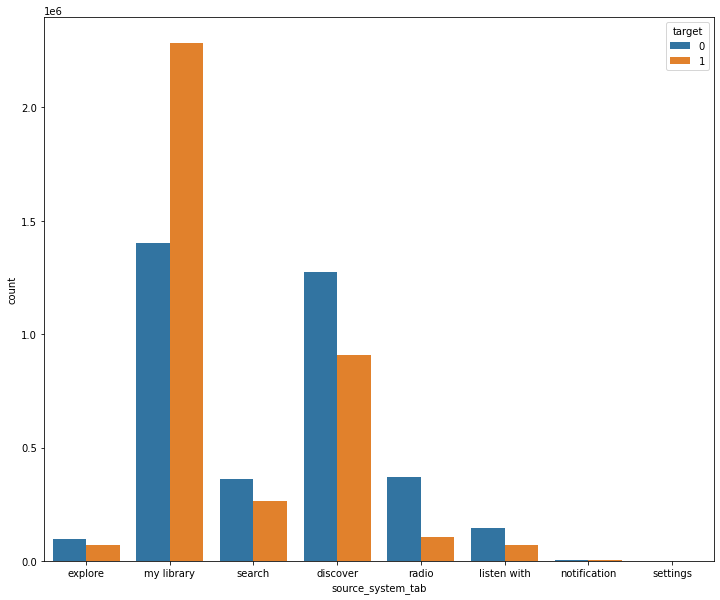

In [ ]:
#Analysing the taget variable with respect to source system 
plt.figure(figsize=(12,10))
sns.countplot(df_train['source_system_tab'],hue=df_train['target'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'online-playlist'),
 Text(0, 0, 'local-playlist'),
 Text(0, 0, 'local-library'),
 Text(0, 0, 'top-hits-for-artist'),
 Text(0, 0, 'album'),
 Text(0, 0, 'song-based-playlist'),
 Text(0, 0, 'radio'),
 Text(0, 0, 'song'),
 Text(0, 0, 'listen-with'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'topic-article-playlist'),
 Text(0, 0, 'my-daily-playlist')]

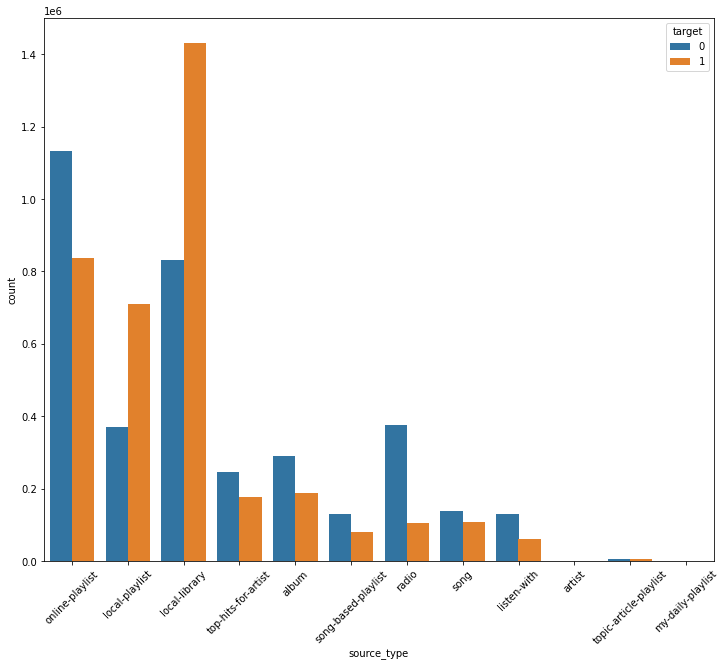

In [ ]:
#Analysing the target variable with respect to source type
plt.figure(figsize=(12,10))
g = sns.countplot(df_train['source_type'],hue=df_train['target'])
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=45)

In [ ]:
#while looking into dataset we are defining source system and source type as categorical variables
df_train['source_system_tab'] = df_train['source_system_tab'].astype("category")
df_train['source_type'] = df_train['source_type'].astype("category")

In [ ]:
#Taking the language count for each number 
df_train['language'].value_counts()

 3.0     4044643
 52.0    1864789
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: language, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


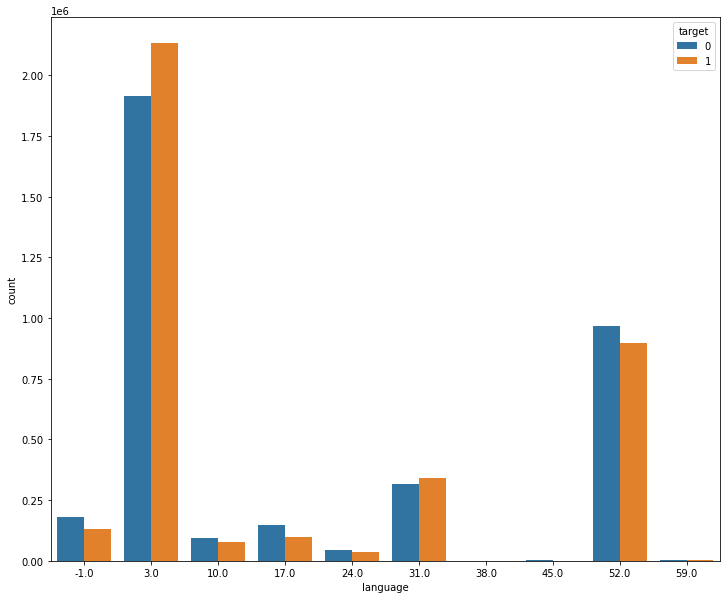

In [ ]:
#plotting target values with respect to the language values 
plt.figure(figsize=(12,10))
sns.countplot(df_train['language'],hue=df_train['target'])
#After analysing the below data 3.0,52.0 and 31.0 are having most of the data

In [ ]:
#Oberserving the above data we are calculating the percentage of data which the above 3 language has 
#we are seeing that almost 90% of data having the 3 languages 
x = df_train['language'].value_counts()
df_len = len(df_train)
for lang_id,count in zip(df_train['language'].value_counts().index,df_train['language'].value_counts()) : 
    
    print(lang_id,":",(100*count / df_len))

3.0 : 54.82464190045894
52.0 : 25.27698715187346
31.0 : 8.900444572884442
-1.0 : 4.1850956527066785
17.0 : 3.3227885420075154
10.0 : 2.330137725692105
24.0 : 1.0656980531671107
59.0 : 0.056835602916901276
45.0 : 0.03249104225895835
38.0 : 0.002846524353100231


(-5.0, 100.0)

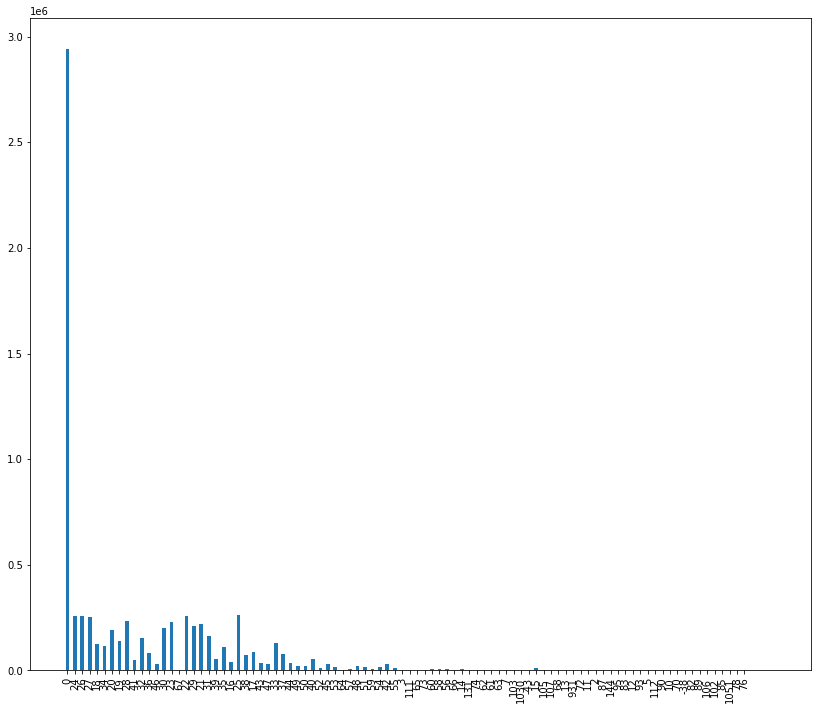

In [ ]:
plt.figure(figsize=(14,12))
df_train['bd'].value_counts(sort=False).plot.bar()

plt.xlim([-5,100])

#Seeing this plot it seems funny that almost 1lk 60k people listen music before they have born 

In [ ]:
print(len(df_train.query("bd<= 0")))
df_train = df_train.query("bd > 0")

2940694


In [ ]:
len(df_train.query("bd > 100"))

6508

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


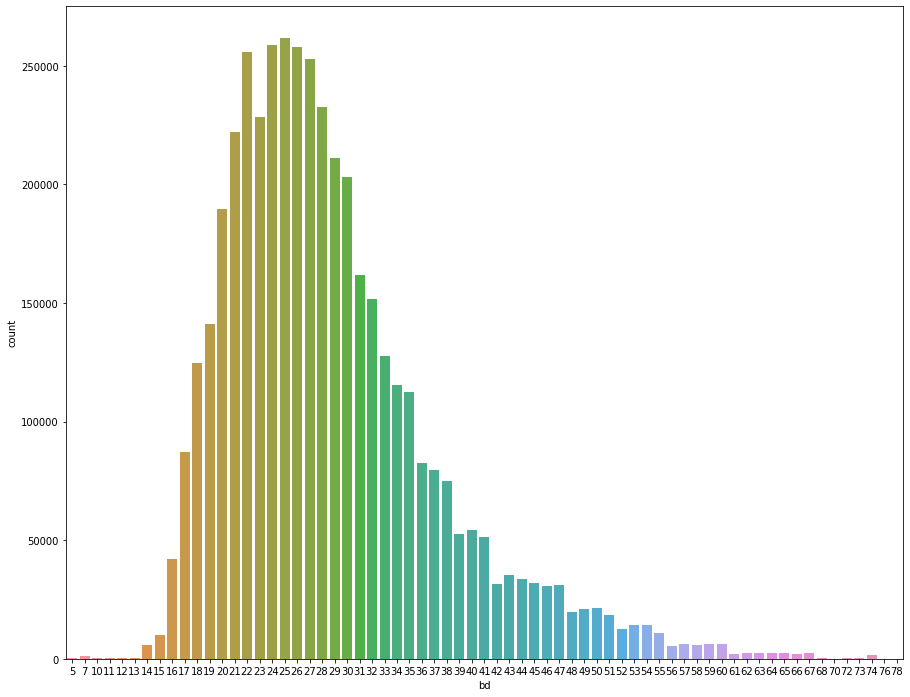

In [ ]:
#lets try to analyse the data for the people who are in the age above 5 and below 80 
df_train_temp = df_train.query("bd >=5 and bd <80")
plt.figure(figsize=(15,12))
sns.countplot(df_train_temp['bd'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


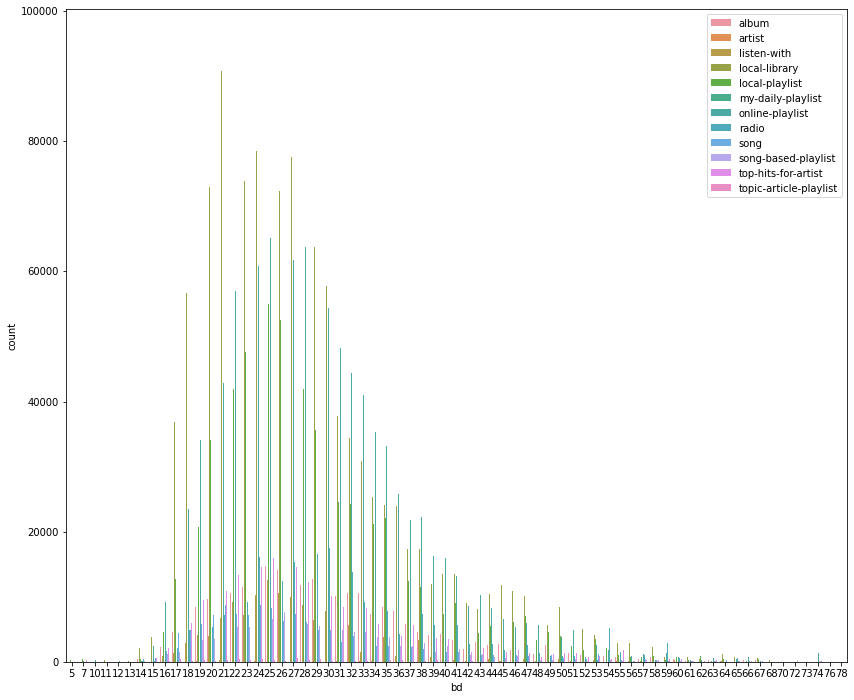

In [ ]:
#Source type vs age_range analysis
plt.figure(figsize=(14,12))
sns.countplot(df_train_temp['bd'],hue=df_train_temp["source_type"])
plt.legend(loc="upper right")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


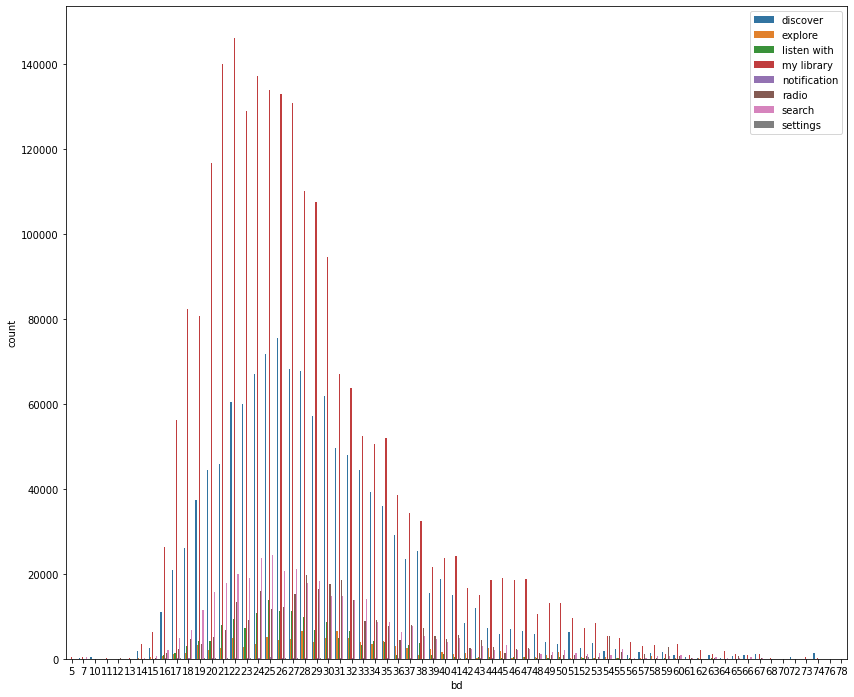

In [ ]:
#source_system_tab vs age_range analysis
plt.figure(figsize=(14,12))
sns.countplot(df_train_temp['bd'],hue=df_train_temp["source_system_tab"])
plt.legend(loc="upper right")

Text(0, 0.5, 'Count')

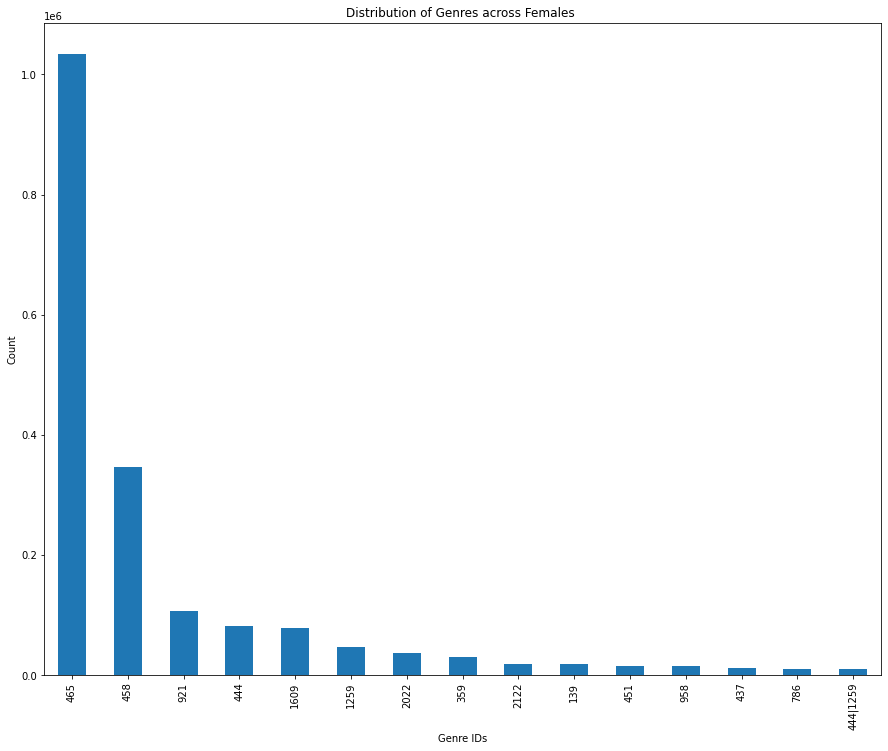

In [ ]:
#Gender with the music genre analysis
#For Female analysing the genre id
plt.figure(figsize=(15,12))
df_train_temp.query("gender =='female'")["genre_ids"].value_counts().head(15).plot.bar()
plt.title("Distribution of Genres across Females ")
plt.xlabel("Genre IDs")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

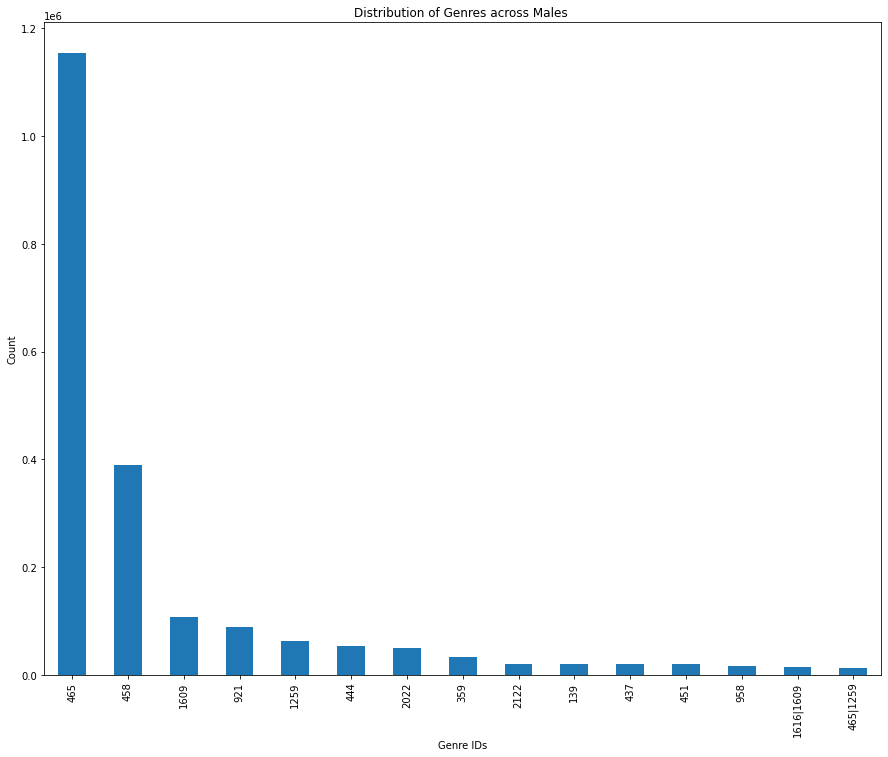

In [ ]:
#For male Genre analysis
plt.figure(figsize=(15,12))
df_train_temp.query("gender =='male'")["genre_ids"].value_counts().head(15).plot.bar()
plt.title("Distribution of Genres across Males ")
plt.xlabel("Genre IDs")
plt.ylabel("Count")

In [ ]:
#lets remove the data points which are not relivent for us age less than 0 and more than 80 
100 * len(df_train.query("bd<= 0 or bd >80")) / len(df_train)

0.16678973044074863

In [ ]:
df_train = df_train.query("bd> 0 and bd <=80")
df_train.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512,13,24,female,9,20110525,20170911
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1,278964.0,2022,OneRepublic,Ryan Tedder,NaN,52.0,Dreaming Out Loud,USUM70759544,15,26,male,9,20111107,20180304


                      Feature Engineering
                    

In [ ]:
df_test.head(5)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
print("Adding new features")

def genre_id_count(x):
    if x == 'no_genre_id':
        return 0
    else:
        return x.count('|') + 1

df_train['genre_ids'].fillna('no_genre_id',inplace=True)
df_train['genre_ids_count'] = df_train['genre_ids'].apply(genre_id_count).astype(np.int8)



def lyricist_count(x):
    if x == 'no_lyricist':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1
    return sum(map(x.count, ['|', '/', '\\', ';']))


df_train['lyricist'].fillna('no_lyricist',inplace=True)
df_train['lyricists_count'] = df_train['lyricist'].apply(genre_id_count).astype(np.int8)


def is_featured(x):
    if 'feat' in str(x) :
        return 1
    return 0

df_train['artist_name'].fillna('no_artist',inplace=True)
df_train['is_featured'] = df_train['artist_name'].apply(is_featured).astype(np.int8)



def artist_count(x):
    if x == 'no_artist':
        return 0
    else:
        return x.count('and') + x.count(',') + x.count('feat') + x.count('&')


df_train['artist_count'] = df_train['artist_name'].apply(artist_count).astype(np.int8)

#If artist is same as composer
df_train['artist_composer'] = (df_train['artist_name'] == df_train['composer']).astype(np.int8)

#If composer,atist and lyricist is same 
df_train['artist_composer_lyricist'] = ((df_train['artist_name'] == df_train['composer']) & (df_train['artist_name'] == df_train['lyricist']) & (df_train['composer'] == df_train['lyricist'])).astype(np.int8)

def song_lang_boolean(x):
    if '17.0' in str(x) or '45.0' in str(x):
        return 1
    return 0

df_train['song_lang_boolean'] = df_train['language'].apply(song_lang_boolean).astype(np.int8)

_mean_song_length = np.mean(df_train['song_length'])
def smaller_song(x):
    if x < _mean_song_length:
        return 1
    return 0

df_train['smaller_song'] = df_train['song_length'].apply(smaller_song).astype(np.int8)

_dict_count_song_played_train = {k: v for k, v in df_train['song_id'].value_counts().iteritems()}
_dict_count_song_played_test = {k: v for k, v in df_test['song_id'].value_counts().iteritems()}

def count_song_played(x):
    try:
        return _dict_count_song_played_train[x]
    except KeyError:
        try:
            return _dict_count_song_played_test[x]
        except KeyError:
            return 0

df_train['count_song_played'] = df_train['song_id'].apply(count_song_played).astype(np.int8)
df_test['count_song_played'] = df_test['song_id'].apply(count_song_played).astype(np.int8)

_dict_user_activity = {k:v for k,v in df_train['msno'].value_counts().iteritems()}
def return_user_activity(x):
    try:
        return _dict_user_activity[x]
    except KeyError:
        return 0
df_train['user_activity_msno'] = df_train['msno'].apply(lambda x: return_user_activity(x))
df_test['user_activity_msno'] = df_test['msno'].apply(lambda x: return_user_activity(x))

Adding new features


In [ ]:
df_train.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,genre_ids_count,lyricists_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,user_activity_msno
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,no_lyricist,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911,1,1,0,0,0,0,0,0,1,622
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,no_lyricist,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911,1,1,0,0,0,0,0,1,4,622
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,no_lyricist,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911,1,1,0,0,0,0,0,0,1,622


In [ ]:
df_test.head(3)

,id,msno,song_id,source_system_tab,source_screen_name,source_type,count_song_played,user_activity_msno
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,-35,0
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,62,0
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,3,0


            Test

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#Lets calculate the NULL value percentage
df_train.isnull().sum()/df_train.isnull().count()*100
#Here we observed that the lyricist , Isrc and gender has a lot of null values

msno                         0.000000
song_id                      0.000000
source_system_tab            0.380216
source_screen_name           5.181942
source_type                  0.310386
target                       0.000000
song_length                  0.001671
genre_ids                    0.000000
artist_name                  0.000000
composer                    22.414910
lyricist                     0.000000
language                     0.002190
name                         0.022125
isrc                         7.440503
city                         0.000000
bd                           0.000000
gender                       3.347125
registered_via               0.000000
registration_init_time       0.000000
expiration_date              0.000000
genre_ids_count              0.000000
lyricists_count              0.000000
is_featured                  0.000000
artist_count                 0.000000
artist_composer              0.000000
artist_composer_lyricist     0.000000
song_lang_bo

In [ ]:
#Droping the null value rows for song_length and language 
df_train.dropna(subset=["song_length"],inplace=True)

df_train.dropna(subset=["language"],inplace=True)

#while looking into dataset we are defining source system and source type as categorical variables
df_train['source_system_tab'] = df_train['source_system_tab'].astype("category")
df_train['source_type'] = df_train['source_type'].astype("category")

df_test['source_system_tab'] = df_test['source_system_tab'].astype("category")
df_test['source_type'] = df_test['source_type'].astype("category")

#looking at the data we dont need the column 

df_train.drop("composer",axis=1,inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 8 columns):
 #   Column              Dtype   
---  ------              -----   
 0   id                  int64   
 1   msno                category
 2   song_id             category
 3   source_system_tab   category
 4   source_screen_name  category
 5   source_type         category
 6   count_song_played   int8    
 7   user_activity_msno  int64   
dtypes: category(5), int64(2), int8(1)
memory usage: 73.9 MB


In [ ]:
# Defining the neccessary features as the categorical features
df_train['registration_init_time'] = df_train['registration_init_time'].astype('category')

for col in df_train.select_dtypes(include=['object']).columns:
    df_train[col] = df_train[col].astype('category')
    
# Here we are  Encoding categorical features

for col in df_train.select_dtypes(include=['category']).columns:
    df_train[col] = df_train[col].cat.codes

df_test['count_song_played'] = df_test['count_song_played'].astype("category")
df_test['user_activity_msno'] = df_test['user_activity_msno'].astype("category")

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 8 columns):
 #   Column              Dtype   
---  ------              -----   
 0   id                  int64   
 1   msno                category
 2   song_id             category
 3   source_system_tab   category
 4   source_screen_name  category
 5   source_type         category
 6   count_song_played   category
 7   user_activity_msno  category
dtypes: category(7), int64(1)
memory usage: 61.7 MB


In [ ]:
# we are using the Random forest classifier for the extraction of important features

model = RandomForestClassifier(n_estimators=25, max_depth=10)
model.fit(df_train[df_train.columns[df_train.columns != 'target']], df_train.target)

RandomForestClassifier(max_depth=10, n_estimators=25)

In [ ]:
# Defining this cell for the feature importance plot
df_plot = pd.DataFrame({'features': df_train.columns[df_train.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

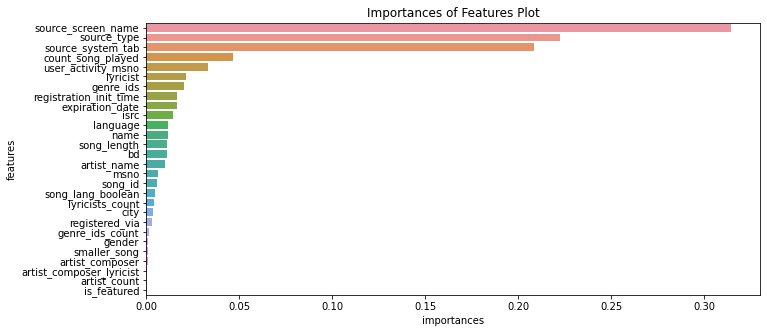

In [ ]:
#Plotting the feature importance
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [ ]:
# From above plot we are dropping the features which are having the importance less than 0.04%
df = df_train.drop(df_plot.features[df_plot.importances <= 0.00].tolist(), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#Spliting  the train and test data for the cross validation
target = df.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.4)

# Delete df
del df

In [ ]:
model_1=model.predict(test_data)

In [ ]:
# The permance metrics
from sklearn import metrics
print(metrics.classification_report(test_labels, model_1))
print(metrics.roc_auc_score(test_labels,model_1))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62    867268
           1       0.64      0.66      0.65    904423

    accuracy                           0.64   1771691
   macro avg       0.64      0.64      0.64   1771691
weighted avg       0.64      0.64      0.64   1771691

0.637124678054529


In [ ]:
#Using XGboost model for the Final fit 
model2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=25)
model2.fit(train_data, train_labels)

XGBClassifier(max_depth=10, min_child_weight=4, n_estimators=25)

In [ ]:
# Predicting the model perfomance on the test data

predict_labels = model2.predict(test_data)

In [ ]:
# The permance metrics
from sklearn import metrics
print(metrics.classification_report(test_labels, predict_labels))
print(metrics.roc_auc_score(test_labels,predict_labels))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63    867268
           1       0.65      0.71      0.68    904423

    accuracy                           0.66   1771691
   macro avg       0.66      0.66      0.66   1771691
weighted avg       0.66      0.66      0.66   1771691

0.6567346150574112


In [ ]:
import lightgbm as lgb
params = {
        'learning_rate': 1.0 ,
        'verbose': 0,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 60,
        'application':'binary',
        'metric':'auc'
    }

In [ ]:
train_set = lgb.Dataset(train_data , train_labels)

In [ ]:
model_fit = lgb.train(params, train_set=train_set,  valid_sets=train_set, verbose_eval=4)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[4]	training's auc: 0.678854
[8]	training's auc: 0.687765
[12]	training's auc: 0.694599
[16]	training's auc: 0.699738
[20]	training's auc: 0.704246
[24]	training's auc: 0.707231
[28]	training's auc: 0.710648
[32]	training's auc: 0.713122
[36]	training's auc: 0.715327
[40]	training's auc: 0.717957
[44]	training's auc: 0.719535
[48]	training's auc: 0.722217
[52]	training's auc: 0.725453
[56]	training's auc: 0.727785
[60]	training's auc: 0.729601


In [ ]:
predict_labels2=model_fit.predict(test_data)
from sklearn import metrics
pre=[]
for i in predict_labels2:
  if i<0.5:
    pre.append(0)
  else:
    pre.append(1)
print(pre)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(metrics.classification_report(test_labels, pre))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65    867268
           1       0.66      0.71      0.68    904423

    accuracy                           0.67   1771691
   macro avg       0.67      0.67      0.67   1771691
weighted avg       0.67      0.67      0.67   1771691

